<a href="https://colab.research.google.com/github/noahcreany/EcologyCenter_SpatialPy/blob/main/3_Wrangling_Spatial_Data_with_GeoPandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GeoPandas
GeoPandas is a python library built on Pandas to read spatial data. Essentially, GeoPandas allows you integrate the geometries of the file and manipulate attribute tables using code.

*First we have to make GeoPandas work in Google Colab*

In [ ]:
%%time
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-8phglgch
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-8phglgch
  fatal: remote error:
    The unauthenticated git protocol on port 9418 is no longer supported.
  Please see https://github.blog/2021-09-01-improving-git-protocol-security-github/ for more information.
ERROR: Command errored out with exit status 128: git clone -q git:/

In [ ]:
import geopandas as gpd

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


Download Utah Wilderness Areas and turn it into a GeoPandas DataFrame

In [ ]:
zipfile ='https://opendata.arcgis.com/datasets/61aa9c31ec96412480f99990d5668a98_0.zip'
utah_wild = gpd.read_file(zipfile)
utah_wild.head()

,OBJECTID,Name,Admin,Acres,SHAPE_Leng,SHAPE_Area,geometry
0,1,Ashdown Gorge Wilderness,USFS,7085,0.421421,0.002927,"POLYGON ((-112.87093 37.68125, -112.87080 37.6..."
1,2,Dark Canyon Wilderness,USFS,46360,3.457917,0.019189,"POLYGON ((-109.87957 37.86163, -109.87962 37.8..."
2,3,Deseret Peak Wilderness,USFS,25078,0.620024,0.010775,"POLYGON ((-112.60643 40.52734, -112.60601 40.5..."
3,4,Cottonwood Forest Wilderness,USFS,2648,0.217429,0.001088,"POLYGON ((-113.39139 37.26847, -113.39141 37.2..."
4,5,Box-Death Hollow Wilderness,USFS,25705,1.166916,0.010657,"POLYGON ((-111.60368 37.97295, -111.60361 37.9..."


In [ ]:
#Which agency manages Utah Wilderness?
utah_wild.Admin.value_counts()

BLM     52
USFS    15
Name: Admin, dtype: int64

In [ ]:
#How much land does each manage?
utah_wild.groupby('Admin')['Acres'].sum()

Admin
BLM     990429
USFS    780843
Name: Acres, dtype: int64

In [ ]:
#How much land does each manage as % of whole?
(utah_wild.groupby('Admin')['Acres'].sum()/(utah_wild.Acres.sum())).mul(100).round(2)

Admin
BLM     55.92
USFS    44.08
Name: Acres, dtype: float64

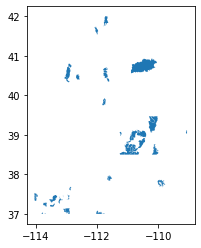

In [ ]:
utah_wild.plot()

Let's add the State and county boundaries for some context

In [ ]:
state = gpd.read_file('https://opendata.arcgis.com/datasets/8344c33ec2114341a59c4c1d72bcf38a_0.zip')
state = state.loc[state.STATE=='Utah']
counties = gpd.read_file('https://opendata.arcgis.com/datasets/90431cac2f9f49f4bcf1505419583753_0.zip')

In [ ]:
state.head()

,OBJECTID,STATE,GlobalID,SHAPE_Leng,SHAPE_Area,geometry
1,2,Utah,{D9D2A5EF-75E3-445A-A71D-45E44328620A},19.999892,22.97495,"POLYGON ((-113.47489 41.99331, -113.47326 41.9..."


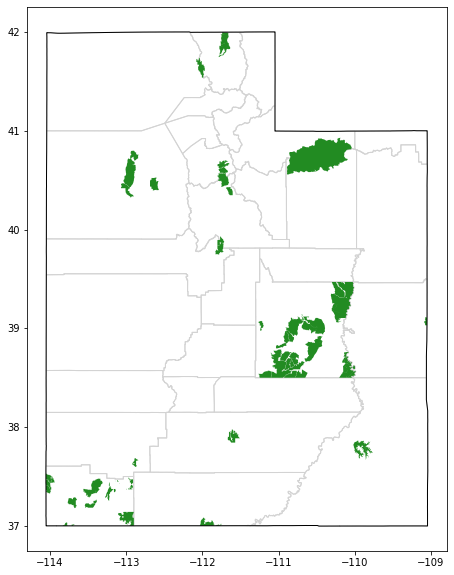

In [ ]:
ax = state.plot(figsize=(10,10), color = 'none',edgecolor = 'black',zorder = 3)
counties.plot(color = 'none',edgecolor = 'lightgrey',ax =ax)
utah_wild.plot(color = 'forestgreen',ax =ax)

#Coordinate Reference Systems

Let's check what our CRS is for the shapefiles we already have. By adding ```.crs``` to the GeoDataFrame GeoPandas returns our epsg crs.

In [ ]:
#First we need to match our CRS
print('utah_wild: ', utah_wild.crs)
print('counties: ', counties.crs)
print('state: ',state.crs)

utah_wild:  epsg:4326
counties:  epsg:4326
state:  epsg:4326


Let's reproject our data to match a WGS 84 projection used in basemaps. To to this we add ```.to_crs(epsg=3857)``` to the GeoDataFrame

In [ ]:
utah_wild_t = utah_wild.to_crs(epsg=3857)
counties_t = counties.to_crs(epsg=3857)
state_t = counties.to_crs(epsg=3857)

Let's add a satellite background to the map using Contextily



```
!pip install contextily
```



In [ ]:
# !pip install contextily
import contextily as cx

#Let's take a look at all of the basemaps we have at our disposal!
cx.providers

{'AzureMaps': {'MicrosoftBaseDarkGrey': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'html_attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'language': 'en-US',
   'name': 'AzureMaps.MicrosoftBaseDarkGrey',
   'subscriptionKey': '<insert your subscription key here>',
   'url': 'https://atlas.microsoft.com/map/tile?api-version={apiVersion}&tilesetId={variant}&x={x}&y={y}&zoom={z}&language={language}&subscription-key={subscriptionKey}',
   'variant': 'microsoft.base.darkgrey'},
  'MicrosoftBaseHybridRoad': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'html_attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'language': 'en-US',
   'name': 'AzureMaps.MicrosoftBaseHybridRoad',
   'subscriptionKey': '<insert your subscription key here>',
   'url': 'https://atlas.microsoft.com/map/tile?api-version={apiVersion}&tilesetId={variant}&x={x}&y={y}&zoom={z}&language={language}&subscription-key={subscriptionKey}',
   'variant': 'microsoft.base.hybrid.road'},
  'MicrosoftBaseRoad': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'html_attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'language': 'en-US',
   'name': 'AzureMaps.MicrosoftBaseRoad',
   'subscriptionKey': '<insert your subscription key here>',
   'url': 'https://atlas.microsoft.com/map/tile?api-version={apiVersion}&tilesetId={variant}&x={x}&y={y}&zoom={z}&language={language}&subscription-key={subscriptionKey}',
   'variant': 'microsoft.base.road'},
  'MicrosoftImagery': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'html_attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'language': 'en-US',
   'name': 'AzureMaps.MicrosoftImagery',
   'subscriptionKey': '<insert your subscription key here>',
   'url': 'https://atlas.microsoft.com/map/tile?api-version={apiVersion}&tilesetId={variant}&x={x}&y={y}&zoom={z}&language={language}&subscription-key={subscriptionKey}',
   'variant': 'microsoft.imagery'},
  'MicrosoftTerraMain': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'html_attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile for details.',
   'language': 'en-US',
   'name': 'AzureMaps.MicrosoftTerraMain',
   'subscriptionKey': '<insert your subscription key here>',
   'url': 'https://atlas.microsoft.com/map/tile?api-version={apiVersion}&tilesetId={variant}&x={x}&y={y}&zoom={z}&language={language}&subscription-key={subscriptionKey}',
   'variant': 'microsoft.terra.main'},
  'MicrosoftWeatherInfraredMain': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile#uri-parameters for details.',
   'html_attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile#uri-parameters for details.',
   'language': 'en-US',
   'name': 'AzureMaps.MicrosoftWeatherInfraredMain',
   'subscriptionKey': '<insert your subscription key here>',
   'timeStamp': '2021-05-08T09:03:00Z',
   'url': 'https://atlas.microsoft.com/map/tile?api-version={apiVersion}&tilesetId={variant}&x={x}&y={y}&zoom={z}&timeStamp={timeStamp}&language={language}&subscription-key={subscriptionKey}',
   'variant': 'microsoft.weather.infrared.main'},
  'MicrosoftWeatherRadarMain': {'apiVersion': '2.0',
   'attribution': 'See https://docs.microsoft.com/en-us/rest/api/maps/render-v2/get-map-tile#uri-parameters for details.',
   'html_attribution': 'See https://docs.mi

We'll use the same code and after we've added our elements to ax, we add the following line of code swapping ```provider.mapname``` with something like ```NASAGIBS.BlueMarble```


```
cx.add_basemap(ax, source = cx.providers.provider.mapname)
```



(-12724203.25651997, -12110560.586880043, 4402658.324615001, 5197358.762685007)

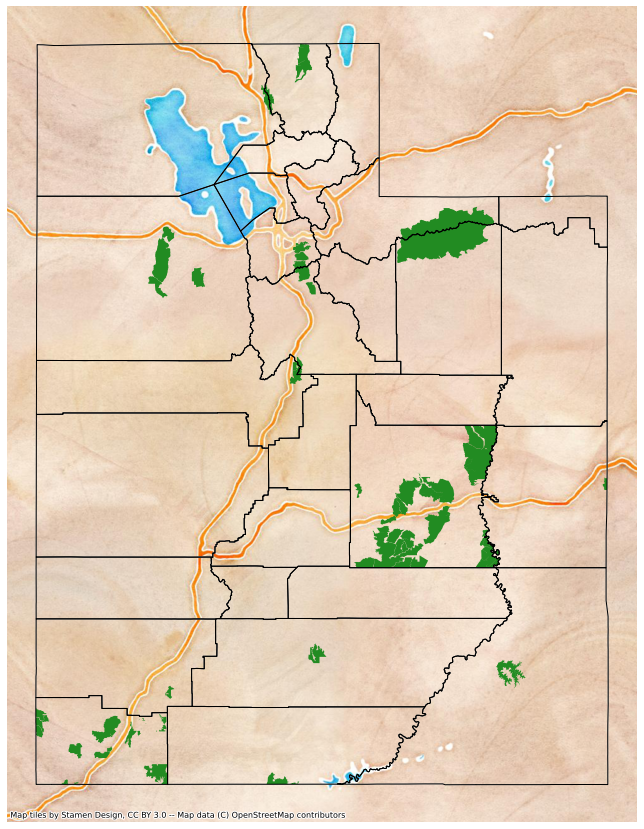

In [ ]:
ax = state_t.plot(figsize=(15,15), color = 'none',edgecolor = 'black',zorder = 3)
counties_t.plot(color = 'none',edgecolor = 'lightgrey',ax =ax)
utah_wild_t.plot(color = 'forestgreen',ax =ax)

cx.add_basemap(ax, source = cx.providers.Stamen.Watercolor)
ax.axis('off') #remove x,y axes


#Data Manipulation

Let's add the County to the ```utah_wild``` dataset so we can see how much wilderness is in each county.




In [ ]:
counties.columns

Index(['OBJECTID', 'COUNTYNBR', 'ENTITYNBR', 'ENTITYYR', 'NAME', 'FIPS',
       'STATEPLANE', 'POP_LASTCE', 'POP_CURRES', 'GlobalID', 'FIPS_STR',
       'COLOR4', 'Shape__Are', 'Shape__Len', 'geometry'],
      dtype='object')

In [ ]:
utah_wild= gpd.sjoin(utah_wild, counties, how ='inner')
utah_wild.head()

,OBJECTID_left,Name,Admin,Acres,SHAPE_Leng,SHAPE_Area,geometry,index_right,OBJECTID_right,COUNTYNBR,...,NAME,FIPS,STATEPLANE,POP_LASTCE,POP_CURRES,GlobalID,FIPS_STR,COLOR4,Shape__Are,Shape__Len
0,1,Ashdown Gorge Wilderness,USFS,7085,0.421421,0.002927,"POLYGON ((-112.87093 37.68125, -112.87080 37.6...",21,22,11,...,IRON,21,South,57289,None,2aca2eb9-31b5-4d6a-a858-a0f6b16c64e2,49021,3,1.373696e+10,5.496631e+05
1,2,Dark Canyon Wilderness,USFS,46360,3.457917,0.019189,"POLYGON ((-109.87957 37.86163, -109.87962 37.8...",24,25,19,...,SAN JUAN,37,South,14518,None,ec858eac-d7e7-4748-b7a5-b2b744668178,49037,3,3.281673e+10,1.066353e+06
2,3,Deseret Peak Wilderness,USFS,25078,0.620024,0.010775,"POLYGON ((-112.60643 40.52734, -112.60601 40.5...",17,18,23,...,TOOELE,45,Central,72698,None,0dd369cc-45b0-46c8-aaac-86bfe2107525,49045,2,3.262339e+10,7.553411e+05
29,30,Cedar Mountain,BLM,15125,0.478830,0.006528,"POLYGON ((-112.90449 40.79835, -112.90448 40.7...",17,18,23,...,TOOELE,45,Central,72698,None,0dd369cc-45b0-46c8-aaac-86bfe2107525,49045,2,3.262339e+10,7.553411e+05
30,31,Cedar Mountain,BLM,69911,1.089765,0.030092,"POLYGON ((-112.94512 40.72398, -112.94511 40.7...",17,18,23,...,TOOELE,45,Central,72698,None,0dd369cc-45b0-46c8-aaac-86bfe2107525,49045,2,3.262339e+10,7.553411e+05


In [ ]:
utah_wild.sample(5)

,OBJECTID_left,Name,Admin,Acres,SHAPE_Leng,SHAPE_Area,geometry,index_right,OBJECTID_right,COUNTYNBR,...,County,FIPS,STATEPLANE,POP_LASTCE,POP_CURRES,GlobalID,FIPS_STR,COLOR4,Shape__Are,Shape__Len
49,50,Cold Wash,BLM,12441,0.480353,0.005233,"POLYGON ((-110.88720 38.98338, -110.88704 38.9...",22,23,08,...,EMERY,15,Central,9825,None,bebbe5d3-9484-4d00-bdd6-a4dc31417b95,49015,3,1.920463e+10,792095.753933
10,11,Mount Timpanogos Wilderness,USFS,10518,0.298879,0.004515,"POLYGON ((-111.63256 40.42952, -111.63227 40.4...",28,29,25,...,UTAH,49,Central,659399,None,8df99710-dcb1-4c52-8ead-e9555c83618f,49049,3,9.499994e+09,629812.249713
36,37,Beaver Dam Mountains,BLM,374,0.060519,0.000153,"POLYGON ((-113.69452 37.00864, -113.69451 37.0...",9,10,27,...,WASHINGTON,53,South,180279,None,83a50666-0cf4-475e-8766-4b034a67f5cb,49053,1,9.961341e+09,436638.751231
2,3,Deseret Peak Wilderness,USFS,25078,0.620024,0.010775,"POLYGON ((-112.60643 40.52734, -112.60601 40.5...",17,18,23,...,TOOELE,45,Central,72698,None,0dd369cc-45b0-46c8-aaac-86bfe2107525,49045,2,3.262339e+10,755341.057793
14,15,Wellsville Mountain Wilderness,USFS,22843,0.785432,0.009990,"POLYGON ((-112.03254 41.72847, -112.03263 41.7...",0,1,03,...,CACHE,5,North,133154,None,ad3015be-b3c9-4316-b8dc-03afbb56b443,49005,2,5.456780e+09,388684.773484


Let's cleanup our newly merged GeoDataFrame

In [ ]:
utah_wild.columns

Index(['OBJECTID_left', 'Name', 'Admin', 'Acres', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry', 'index_right', 'OBJECTID_right', 'COUNTYNBR', 'ENTITYNBR',
       'ENTITYYR', 'NAME', 'FIPS', 'STATEPLANE', 'POP_LASTCE', 'POP_CURRES',
       'GlobalID', 'FIPS_STR', 'COLOR4', 'Shape__Are', 'Shape__Len'],
      dtype='object')

In [ ]:
utah_wild = utah_wild.rename(columns = {'NAME':'County'})

In [ ]:
#How many acres of Wilderness in each Utah County
utah_wild.groupby('County')['Acres'].sum()

County
BOX ELDER      22843
CACHE          67416
CARBON        192525
DUCHESNE      453863
EMERY         733938
GARFIELD       25705
GRAND         225244
IRON            7085
JUAB           27084
KANE           65864
SALT LAKE      57431
SAN JUAN       46360
SUMMIT        453863
TOOELE        129277
UTAH           68234
WASHINGTON    186080
WAYNE         229477
Name: Acres, dtype: int64

In [ ]:
#How many acres of Wilderness per person based on recent Census estimate?
(utah_wild.groupby('County')['Acres'].sum()/utah_wild.groupby('County')['POP_LASTCE'].mean()).round(2)

County
BOX ELDER      0.40
CACHE          0.51
CARBON         9.43
DUCHESNE      23.16
EMERY         74.70
GARFIELD       5.06
GRAND         23.30
IRON           0.12
JUAB           2.30
KANE           8.59
SALT LAKE      0.05
SAN JUAN       3.19
SUMMIT        10.72
TOOELE         1.78
UTAH           0.10
WASHINGTON     1.03
WAYNE         92.31
dtype: float64

How far away is the nearest Wilderness area for Utah Cities?

In [ ]:
utah_cities = gpd.read_file('https://opendata.arcgis.com/datasets/543fa1f073714198a3dbf8a292bdf30c_0.zip')
utah_cities.geometry

0      MULTIPOLYGON (((-111.85610 39.71014, -111.8560...
1      POLYGON ((-113.06153 37.11222, -113.06605 37.1...
2      POLYGON ((-111.17444 41.52415, -111.16949 41.5...
3      POLYGON ((-111.96242 38.86808, -111.96143 38.8...
4      POLYGON ((-110.85665 39.35292, -110.85441 39.3...
                             ...                        
248    POLYGON ((-111.93653 40.53949, -111.93650 40.5...
249    POLYGON ((-111.69709 41.04576, -111.69686 41.0...
250    POLYGON ((-111.63320 40.20839, -111.63410 40.2...
251    POLYGON ((-111.92724 40.90345, -111.92045 40.9...
252    POLYGON ((-111.97163 41.34088, -111.96950 41.3...
Name: geometry, Length: 253, dtype: geometry

In [ ]:
#Lets use a UTM CRS for consistency between the GeoDFs
utah_wild_utm = utah_wild.to_crs(epsg= 26912)
utah_cities_utm = utah_cities.to_crs(epsg = 26912)

In [ ]:
#Since the Cities are Polygons, lets cast them to points using the centroid of the polygon
utah_cities_utm['centroid'] = utah_cities_utm.geometry.centroid

In [ ]:
utah_cities_utm['Distance_To_Wld'] = utah_cities_utm['centroid'].apply(lambda x: utah_wild_utm.geometry.distance(x).min())

In [ ]:
utah_cities_utm

,OBJECTID,COUNTYNBR,NAME,COUNTYSEAT,SHORTDESC,UPDATED,FIPS,ENTITYNBR,SALESTAXID,IMSCOLOR,...,POPLASTCEN,POPLASTEST,UGRCODE,GNIS,GlobalID,Shape__Are,Shape__Len,geometry,centroid,Distance_To_Wld
0,1,12,Nephi,1,NEPHI CITY,2021-08-04,54220,3040.0,026,3,...,6443.0,6378.0,NEP,1443793,4c8a63be-5865-4195-811f-003f1a838422,2.360047e+07,43136.091137,"MULTIPOLYGON (((426614.580 4395936.542, 426613...",POINT (428583.634 4395376.999),4930.386371
1,2,27,Rockville,0,ROCKVILLE,None,64560,3075.0,019,4,...,226.0,269.0,RKV,1431946,72101a01-f566-4d96-ae16-00f5ccac1109,3.456931e+07,43706.337013,"POLYGON ((316832.425 4109310.199, 316430.695 4...",POINT (317517.206 4113247.588),1811.560548
2,3,17,Woodruff,0,WOODRUFF,2017-11-17,85260,3040.0,010,4,...,169.0,212.0,WDR,1434462,c0b43c7a-2a9b-4fa5-ba0b-0173e9b73a63,3.313525e+06,10342.831397,"POLYGON ((485446.223 4596959.752, 485858.913 4...",POINT (486319.697 4596630.041),52091.595078
3,4,21,Sigurd,0,SIGURD TOWN,2020-07-13,68650,3110.0,038,4,...,405.0,443.0,SIG,1445583,13d45372-495a-4382-bd53-02dee91c3169,4.223717e+06,25084.077809,"POLYGON ((416506.811 4302577.565, 416592.805 4...",POINT (416011.815 4300510.560),64458.510784
4,5,08,Cleveland,0,CLEVELAND,2019-09-20,14070,3030.0,004,1,...,497.0,440.0,CLE,1426712,e24dd82c-61e7-4fe0-913c-0332e976bc74,3.741190e+06,11224.922543,"POLYGON ((512351.178 4355951.053, 512544.157 4...",POINT (512448.958 4355569.888),26122.242487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,249,18,Riverton,0,RIVERTON,2019-10-25,64340,3060.0,118,2,...,45285.0,44440.0,RVT,1431862,bb00659b-f2e2-4121-b1e0-f837bd79d0ed,5.655174e+07,45927.710700,"POLYGON ((420690.492 4488058.912, 420692.472 4...",POINT (418378.727 4485655.543),13919.678733
249,250,15,Morgan,1,MORGAN,2013-12-16,51910,3010.0,007,3,...,4071.0,4273.0,MRG,1430488,b2679c53-7d2f-4351-8db9-fa6463647ed0,1.350393e+07,21707.595262,"POLYGON ((441414.146 4544070.928, 441433.396 4...",POINT (442829.772 4543579.278),37669.607841
250,251,25,Provo,1,PROVO,2021-06-25,62470,3150.0,090,4,...,115162.0,116618.0,PVO,1444661,042a19fc-e45f-4a5d-8418-fbaf36663b04,1.966834e+08,118107.921172,"POLYGON ((446114.294 4451079.247, 446037.993 4...",POINT (445075.575 4455229.018),11388.271713
251,252,06,West Bountiful,0,WEST BOUNTIFUL,2020-11-30,82840,3130.0,061,2,...,5917.0,5800.0,WBO,1447113,ca9d3d50-a071-42ad-9337-fdbe84093cdc,1.496690e+07,23266.302220,"POLYGON ((421903.123 4528453.486, 422475.010 4...",POINT (423496.296 4527861.492),25663.876301


In [ ]:
print('Mean distance to monitoring stations: {} meters'.format(utah_cities_utm.Distance_To_Wld.mean()))


Mean distance to monitoring stations: 27926.748133227145 meters


In [ ]:
print('Closest Wilderness area ({} m):'.format(utah_cities_utm.Distance_To_Wld.min()))
print(utah_cities_utm.iloc[distances.idxmin()])

Closest Wilderness area (294.3746627727658 m):
OBJECTID                                                          26
COUNTYNBR                                                         18
NAME                                                       Bluffdale
COUNTYSEAT                                                         0
SHORTDESC                                          BLUFFDALE (SL CO)
UPDATED                                                   2018-11-15
FIPS                                                           06810
ENTITYNBR                                                     3020.0
SALESTAXID                                                       019
IMSCOLOR                                                           4
MINNAME                                                         None
POPLASTCEN                                                   17014.0
POPLASTEST                                                   16358.0
UGRCODE                                                 

Let's plot the distance to Wilderness for these cities

In [ ]:
utah_cities = gpd.GeoDataFrame(utah_cities)

(-12719315.340156816,
 -12145153.252815612,
 4405453.308585879,
 5193130.927251619)

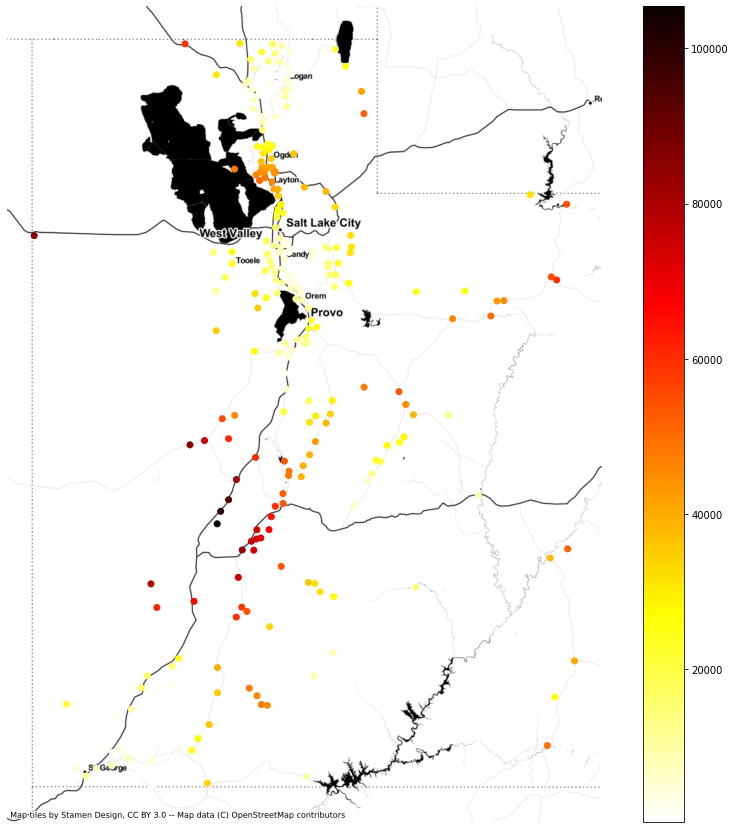

In [ ]:
utah_cities = utah_cities_utm.to_crs(utah_wild_t.crs) #We can use the .crs from another dataframe

utah_cities = utah_cities[['centroid','Distance_To_Wld']]
utah_cities = gpd.GeoDataFrame(utah_cities, geometry='centroid')
utah_cities = utah_cities.to_crs(utah_wild_t.crs)

ax = utah_cities.plot(figsize=(15,15),marker='o',
                          column = 'Distance_To_Wld', cmap = 'hot_r', legend = True)
cx.add_basemap(ax, source = cx.providers.Stamen.Toner)
ax.axis('off') #remove x,y axes
